In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import import_ipynb
import data_preperation as dp
import internal_inconsistencies as ii


importing Jupyter notebook from data_preperation.ipynb
importing Jupyter notebook from internal_inconsistencies.ipynb


In [2]:
countries={ 'Austria': 'AT', 'Belgium': 'BE',  'Bulgaria': 'BG', 'Switzerland': 'CH', 'Czech Republic': 'CZ', 'Germany': 'DE', 'Denmark': 'DK', 'Estonia': 'EE', 'Spain': 'ES', 'Finland': 'FI', 'France': 'FR',  'Greece': 'GR', 'Hungary': 'HU', 'Ireland': 'IE', 'Italy': 'IT', 'Lithuania': 'LT', 'Latvia': 'LV', 'Montenegro': 'ME','Netherlands': 'NL', 'Norway': 'NO', 'Poland': 'PL', 'Portugal': 'PT', 'Serbia': 'RS', 'Sweden': 'SE', 'Slovenia': 'SI', 'Slovakia': 'SK', 'United Kingdom': 'UK'}

abbr_list=list(countries.values())

# 1. Calculating missing values in ENTSO-E data

In [3]:
load_gen_missing_values, transmission_missing_values = ii.calculate_missing_values(countries)
display(load_gen_missing_values,transmission_missing_values)


Load Data                     Generation Data                    
        File No. of missing data            File No. of missing data
0         AT                   0              AT                   0
1         BE                   0              BE                8027
2         BG                  26              BG                8760
3         CH                   0              CH                8760
4         CZ                   7              CZ                  44
5         DE                  96              DE               34848
6         DK                   0              DK                   0
7         EE                 168              EE                2266
8         ES                   2              ES                8780
9         FI                   3              FI                  28
10        FR                  18              FR                9641
11        GR                   2              GR                8773
12        HU                   0              HU               12123
13        IE                 210              IE               15062
14        IT                   0              IT                3538
15        LT                  91              LT                 297
16        LV                  54              LV                  50
17        ME                   0              ME                7246
18        NL                   0              NL                8635
19        NO                   0              NO                   9
20        PL                   1              PL                8760
21        PT                   0              PT                   0
22        RS                   1              RS                8943
23        SE                   0              SE                   1
24        SI                   0              SI                8770
25        SK                   0              SK               11679
26        UK                 488              UK               18029

Transmission Data                    
                 File No. of missing data
0           AT --> CH                   0
1           AT --> CZ                   0
2           AT --> DE                   0
3           AT --> HU                   0
4           AT --> IT                   0
..                ...                 ...
126         UK --> BE                  50
127         UK --> FR                  60
128         UK --> IE                   0
129         UK --> NL                   0
130         UK --> NO                   0

[131 rows x 2 columns]

# 2. ENTSO-E data representation

## 2.1 Get all the hourly load data of each country to a single dataframe

In [4]:
load_data=dp.load(countries)
display(load_data)


,Day,Month,Year,Time,AT,BE,BG,CH,CZ,DE,...,ME,NL,NO,PL,PT,RS,SE,SI,SK,UK
0,01,01,2018,00:00 - 01:00,6154.75,8545.75,4094.0,7629.0,5520.0,44877.75,...,418.0,10823.00,16989.0,14979.0,4870.0,5095.0,15563.0,1126.0,2845.0,31540.0
1,01,01,2018,01:00 - 02:00,5934.25,8143.50,3910.0,7355.0,5495.0,43816.50,...,403.0,10689.75,16762.0,14398.0,4639.0,5142.0,15229.0,1103.0,2734.0,31486.0
2,01,01,2018,02:00 - 03:00,5728.75,7789.00,3761.0,7282.0,5461.0,42820.00,...,377.0,10353.75,16509.0,13789.0,4500.0,4908.0,15259.0,1056.0,2659.0,30717.0
3,01,01,2018,03:00 - 04:00,5467.25,7470.75,3654.0,7457.0,5302.0,42051.75,...,351.0,10032.25,16109.0,13434.0,4254.0,4564.0,15026.0,1018.0,2583.0,28379.0
4,01,01,2018,04:00 - 05:00,5327.50,7354.50,3602.0,7429.0,5258.0,42061.50,...,333.0,9766.25,16152.0,13285.0,4047.0,4297.0,14844.0,1006.0,2568.0,26049.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,31,12,2018,19:00 - 20:00,7241.25,9655.75,5211.0,7268.0,6613.0,54365.50,...,520.0,13771.75,17569.0,18543.0,6616.0,6072.0,17255.0,1540.0,3169.0,41221.0
8757,31,12,2018,20:00 - 21:00,6846.25,9188.00,4799.0,6996.0,6369.0,50783.00,...,501.0,12802.00,16899.0,17283.0,6559.0,5761.0,16421.0,1439.0,3093.0,38002.0
8758,31,12,2018,21:00 - 22:00,6473.00,8959.25,4680.0,6613.0,6215.0,48764.75,...,471.0,11962.25,16559.0,16447.0,6013.0,5379.0,15692.0,1342.0,2991.0,34996.0
8759,31,12,2018,22:00 - 23:00,6569.00,9217.25,4607.0,6396.0,6093.0,48232.25,...,441.0,11481.50,16088.0,16070.0,5506.0,5209.0,15268.0,1287.0,2937.0,32300.0


## 2.2 Get all the hourly generation data of each country from each source to a single dataframe

In [5]:
generation_data=dp.generation(countries)
display(generation_data)

,Day,Month,Year,Time,AT - Biomass,AT - Fossil Gas,AT - Fossil Hard coal,AT - Fossil Oil,AT - Geothermal,AT - Hydro Pumped Storage,...,UK - Fossil Oil,UK - Hydro Pumped Storage,UK - Hydro Pumped Storage,UK - Hydro Run-of-river and poundage,UK - Nuclear,UK - Other,UK - Solar,UK - Wind Offshore,UK - Wind Onshore,UK - Total
0,01,01,2018,00:00 - 01:00,316.0,78.25,151.00,0.0,0.0,0.0,...,0.0,22.5,NaN,353.5,7268.0,89.0,0.0,3804.5,5333.0,24444.5
1,01,01,2018,01:00 - 02:00,316.0,71.00,150.25,0.0,0.0,0.0,...,0.0,0.0,NaN,351.5,7265.5,89.0,0.0,3801.0,5475.0,24535.0
2,01,01,2018,02:00 - 03:00,316.0,69.25,149.00,0.0,0.0,0.0,...,0.0,103.0,NaN,352.0,7259.0,88.5,0.0,3821.0,5379.0,25190.5
3,01,01,2018,03:00 - 04:00,316.0,69.50,149.25,0.0,0.0,0.0,...,0.0,0.0,NaN,335.5,7258.0,89.0,0.0,3800.5,5211.5,24235.0
4,01,01,2018,04:00 - 05:00,316.0,72.25,148.75,0.0,0.0,0.0,...,0.0,0.0,NaN,282.0,7254.5,89.0,0.0,3773.5,5198.5,23576.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,31,12,2018,19:00 - 20:00,304.0,1807.00,154.75,0.0,0.0,156.5,...,10.5,194.5,NaN,487.5,6930.5,63.5,0.0,1317.5,4894.5,31903.5
8757,31,12,2018,20:00 - 21:00,302.0,1748.75,154.75,0.0,0.0,0.0,...,1.0,165.5,NaN,442.0,6937.0,63.0,0.0,2667.0,7160.5,33010.5
8758,31,12,2018,21:00 - 22:00,300.0,1669.00,155.25,0.0,0.0,0.0,...,0.0,217.5,NaN,424.0,6935.0,63.5,0.0,2815.0,6979.5,30027.0
8759,31,12,2018,22:00 - 23:00,303.0,1559.50,154.00,0.0,0.0,0.0,...,5.5,153.0,NaN,415.0,6938.5,65.0,0.0,2946.0,6825.5,27118.5


## 2.3 Get all the hourly cross-border transmission data of each country to a single dataframe

In [6]:
crossborder_data, transmission_data = dp.cross_border(abbr_list)

In [7]:
# display(transmission_data.head())

### 2.3.1 'cross_border_data' shows the net import/net export of the whole country in hourly timesteps

In [8]:
display(crossborder_data)

,Day,Month,Year,Time,AT,BE,BG,CH,CZ,DE,...,ME,NL,NO,PL,PT,RS,SE,SI,SK,UK
0,01,01,2018,00:00 - 01:00,-2232.0,1087.0,252.0,-2663.0,158.0,14551.0,...,49.0,-34.0,-2851.0,-158.0,-1796.0,-254.0,1879.0,47.0,280.0,-3001.0
1,01,01,2018,01:00 - 02:00,-2571.0,1192.0,259.0,-2464.0,28.0,15432.0,...,68.0,173.0,-2452.0,24.0,-1375.0,-273.0,1267.0,-916.0,387.0,-2562.0
2,01,01,2018,02:00 - 03:00,-2380.0,1123.0,277.0,-2680.0,-268.0,15739.0,...,71.0,487.0,-3143.0,367.0,-1525.0,-229.0,1131.0,-870.0,274.0,-2576.0
3,01,01,2018,03:00 - 04:00,-2443.0,1021.0,241.0,-2742.0,-654.0,16078.0,...,72.0,604.0,-4058.0,630.0,-1479.0,-132.0,1218.0,-791.0,327.0,-2433.0
4,01,01,2018,04:00 - 05:00,-2453.0,383.0,267.0,-2547.0,-624.0,15343.0,...,30.0,781.0,-4070.0,848.0,-1499.0,-60.0,1407.0,-875.0,329.0,-2436.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,31,12,2018,19:00 - 20:00,-783.0,-2978.0,1129.0,-620.0,3626.0,4839.0,...,-90.0,87.0,-3698.0,-24.0,1099.0,-649.0,5429.0,-1.0,96.0,-2567.0
8757,31,12,2018,20:00 - 21:00,-1065.0,-2636.0,1124.0,-910.0,3801.0,7539.0,...,-177.0,64.0,-4281.0,-766.0,1329.0,-768.0,4909.0,-88.0,-110.0,-2211.0
8758,31,12,2018,21:00 - 22:00,-841.0,-2354.0,1112.0,-1113.0,3745.0,9331.0,...,-175.0,-76.0,-4473.0,-297.0,937.0,-699.0,4497.0,-181.0,-28.0,-2213.0
8759,31,12,2018,22:00 - 23:00,-1144.0,-2505.0,1201.0,-1280.0,3710.0,10615.0,...,-146.0,603.0,-4219.0,429.0,-25.0,-667.0,4165.0,-171.0,115.0,-2263.0


### 2.3.2 Calculate net imports/ net exports of each country in each hour based on generation - load data of the country

In [9]:
import_export_using_load_gen=dp.import_export_using_load_gen(load_data,generation_data,abbr_list)
display(import_export_using_load_gen)

,Day,Month,Year,Time,AT - [gen - load],BE - [gen - load],BG - [gen - load],CH - [gen - load],CZ - [gen - load],DE - [gen - load],...,ME - [gen - load],NL - [gen - load],NO - [gen - load],PL - [gen - load],PT - [gen - load],RS - [gen - load],SE - [gen - load],SI - [gen - load],SK - [gen - load],UK - [gen - load]
0,01,01,2018,00:00 - 01:00,163.75,1026.25,543.0,-4333.0,153.0,12632.25,...,-262.0,-1213.25,-2858.0,-1227.0,-1566.0,-855.0,1324.0,45.0,452.0,-7095.5
1,01,01,2018,01:00 - 02:00,311.25,1340.50,644.0,-4269.0,450.0,14265.75,...,-248.0,-986.25,-2466.0,-987.0,-1224.0,-872.0,1054.0,-27.0,493.0,-6951.0
2,01,01,2018,02:00 - 03:00,615.75,1795.00,769.0,-3956.0,775.0,16040.00,...,-222.0,-662.25,-3144.0,-534.0,-994.0,-760.0,967.0,-19.0,564.0,-5526.5
3,01,01,2018,03:00 - 04:00,574.75,1906.25,885.0,-4178.0,1461.0,18558.25,...,-196.0,-509.25,-4033.0,-244.0,-123.0,-450.0,1054.0,142.0,867.0,-4144.0
4,01,01,2018,04:00 - 05:00,240.00,2492.50,941.0,-5062.0,1589.0,19207.00,...,-178.0,-284.00,-4069.0,43.0,40.0,-103.0,1147.0,122.0,907.0,-2473.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,31,12,2018,19:00 - 20:00,-880.00,-3016.75,1085.0,-2694.0,3632.0,867.25,...,-91.0,-1863.00,-3684.0,-1583.0,1116.0,-1407.0,5225.0,15.0,170.0,-9317.5
8757,31,12,2018,20:00 - 21:00,-651.00,-2645.00,1081.0,-2868.0,3813.0,3608.25,...,-178.0,-1750.00,-4278.0,-2076.0,1344.0,-1550.0,5114.0,-74.0,188.0,-4991.5
8758,31,12,2018,21:00 - 22:00,-579.00,-2397.25,1073.0,-2754.0,3755.0,5547.75,...,-177.0,-1813.00,-4481.0,-1601.0,949.0,-1263.0,4557.0,-166.0,150.0,-4969.0
8759,31,12,2018,22:00 - 23:00,-980.75,-2535.25,1161.0,-2459.0,3720.0,6881.50,...,-148.0,-1072.75,-4223.0,-929.0,-11.0,-1254.0,4126.0,-158.0,200.0,-5181.5


### 2.3.3 Calculate net imports/ net exports of each country in each hour based on cross-border transmission data of the country

In [10]:
import_export_using_crossborder_data=dp.import_export_using_crossborder(crossborder_data,abbr_list)
display(import_export_using_crossborder_data)

,Day,Month,Year,Time,AT - [exp - imp],BE - [exp - imp],BG - [exp - imp],CH - [exp - imp],CZ - [exp - imp],DE - [exp - imp],...,ME - [exp - imp],NL - [exp - imp],NO - [exp - imp],PL - [exp - imp],PT - [exp - imp],RS - [exp - imp],SE - [exp - imp],SI - [exp - imp],SK - [exp - imp],UK - [exp - imp]
0,01,01,2018,00:00 - 01:00,-2232.0,1087.0,252.0,-2663.0,158.0,14551.0,...,49.0,-34.0,-2851.0,-158.0,-1796.0,-254.0,1879.0,47.0,280.0,-3001.0
1,01,01,2018,01:00 - 02:00,-2571.0,1192.0,259.0,-2464.0,28.0,15432.0,...,68.0,173.0,-2452.0,24.0,-1375.0,-273.0,1267.0,-916.0,387.0,-2562.0
2,01,01,2018,02:00 - 03:00,-2380.0,1123.0,277.0,-2680.0,-268.0,15739.0,...,71.0,487.0,-3143.0,367.0,-1525.0,-229.0,1131.0,-870.0,274.0,-2576.0
3,01,01,2018,03:00 - 04:00,-2443.0,1021.0,241.0,-2742.0,-654.0,16078.0,...,72.0,604.0,-4058.0,630.0,-1479.0,-132.0,1218.0,-791.0,327.0,-2433.0
4,01,01,2018,04:00 - 05:00,-2453.0,383.0,267.0,-2547.0,-624.0,15343.0,...,30.0,781.0,-4070.0,848.0,-1499.0,-60.0,1407.0,-875.0,329.0,-2436.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,31,12,2018,19:00 - 20:00,-783.0,-2978.0,1129.0,-620.0,3626.0,4839.0,...,-90.0,87.0,-3698.0,-24.0,1099.0,-649.0,5429.0,-1.0,96.0,-2567.0
8757,31,12,2018,20:00 - 21:00,-1065.0,-2636.0,1124.0,-910.0,3801.0,7539.0,...,-177.0,64.0,-4281.0,-766.0,1329.0,-768.0,4909.0,-88.0,-110.0,-2211.0
8758,31,12,2018,21:00 - 22:00,-841.0,-2354.0,1112.0,-1113.0,3745.0,9331.0,...,-175.0,-76.0,-4473.0,-297.0,937.0,-699.0,4497.0,-181.0,-28.0,-2213.0
8759,31,12,2018,22:00 - 23:00,-1144.0,-2505.0,1201.0,-1280.0,3710.0,10615.0,...,-146.0,603.0,-4219.0,429.0,-25.0,-667.0,4165.0,-171.0,115.0,-2263.0


# 3. Internal inconsistencies

## 3.1 Comparision of annual net imports/ net exports of each country based on generation/load & cross-border transmission data

,Country,Value based on (exp - imp)[GWh],Value based on (gen - load)[GWh],% difference with respect to Value based on (exp - imp) [%]
0,AT,-10350.50,-5377.61,48.04
1,BE,-17523.23,-15385.96,12.20
2,BG,7545.95,8160.30,-8.14
3,CH,-998.07,-16489.67,-1552.16
4,CZ,13616.21,16638.53,-22.20
5,DE,50586.54,44550.08,11.93
6,DK,-5128.40,-4117.99,19.70
7,EE,1373.58,1797.04,-30.83
8,ES,-14589.26,-5104.86,65.01
9,FI,-19551.70,-22328.06,-14.20


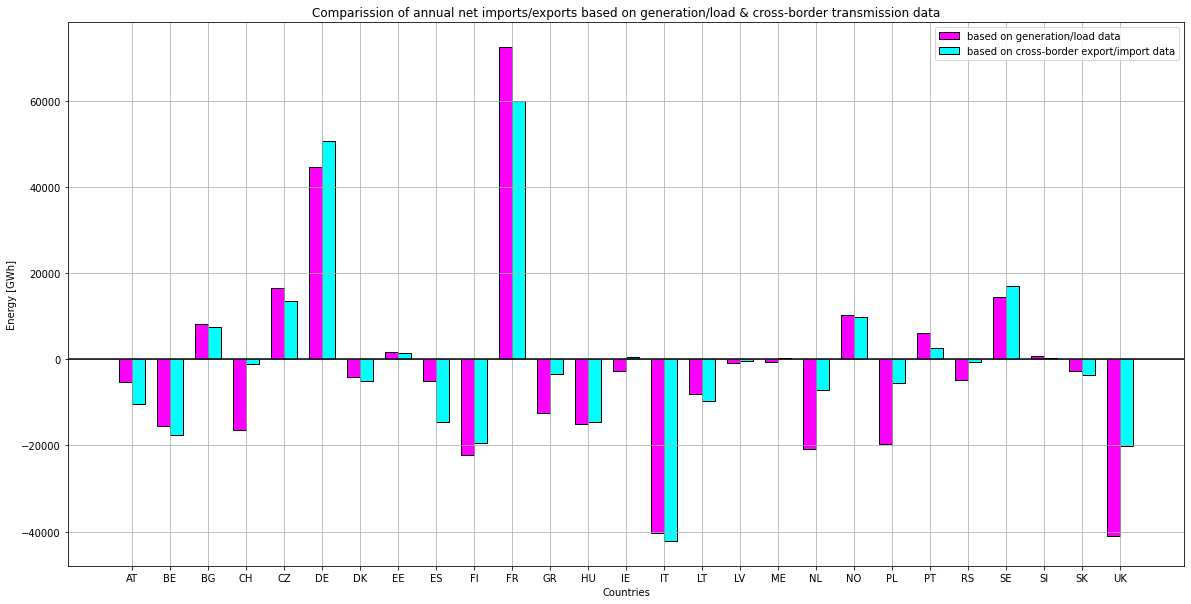

In [11]:
ii.entsoe_comparission_transmission_data(import_export_using_load_gen, import_export_using_crossborder_data, abbr_list)

# 4. Comparission of ENTSO-E data with other sources

## 4.1 Comparing ENTSO-E & Eurostat data

### 4.1.1 Comparing annual generation data of ENTSO-E & Eurostat data

,Country,Gen data based on ENTSO-E[GWh],Gen data based on Eurostat[GWh],% difference with respect to Value based on ENTSO-E [%]
0,AT,58270.81,65383.71,-12.21
1,BE,72101.53,71984.30,0.16
2,BG,46353.82,42714.42,7.85
3,CZ,83409.88,80861.14,3.06
4,DE,551907.93,608912.00,-10.33
5,DK,29472.14,29314.30,0.54
6,EE,10119.12,10932.80,-8.04
7,ES,249469.27,263827.00,-5.76
8,FI,63432.92,67533.00,-6.46
9,FR,543676.09,557797.81,-2.60


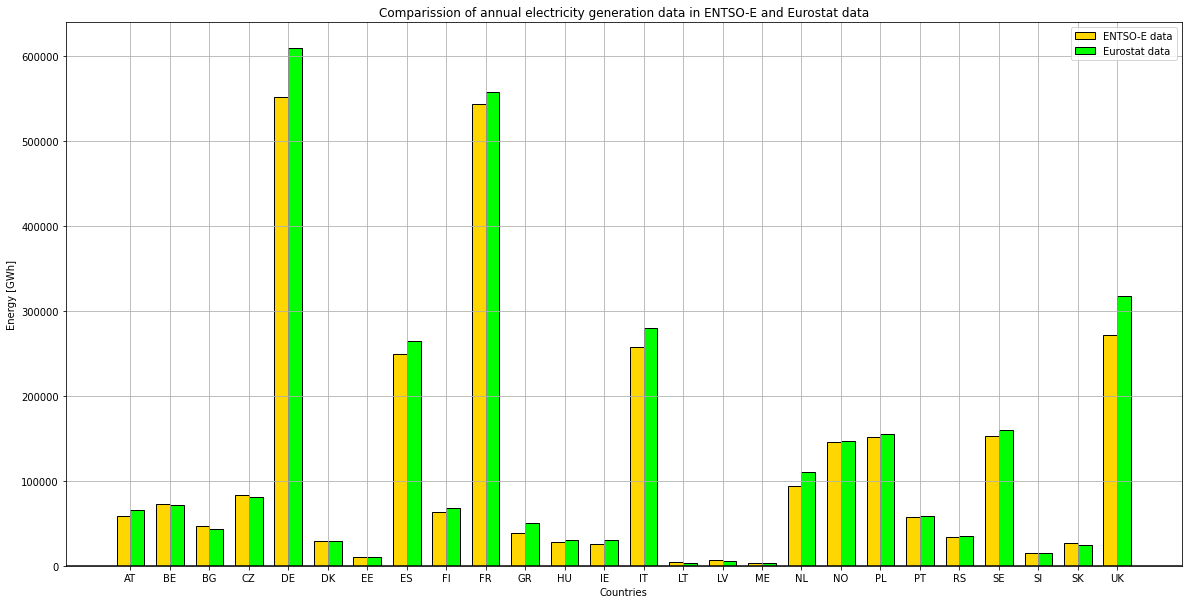

In [12]:
ii.eurostat_comparission_gen_data(generation_data,countries)

### 4.1.2 Comparing annual load data of ENTSO-E & Eurostat data

,Country,Load data based on ENTSO-E[GWh],Load data based on Eurostat[GWh],% difference with respect to Value based on ENTSO-E [%]
0,AT,63648.43,65855.94,-3.47
1,BE,87487.49,84611.30,3.29
2,BG,38070.08,31304.23,17.77
3,CZ,66721.61,59845.25,10.31
4,DE,507357.85,525071.00,-3.49
5,DK,33590.13,32104.67,4.42
6,EE,8320.43,7985.00,4.03
7,ES,254539.09,245769.00,3.45
8,FI,85753.95,84021.00,2.02
9,FR,470390.26,445771.50,5.23


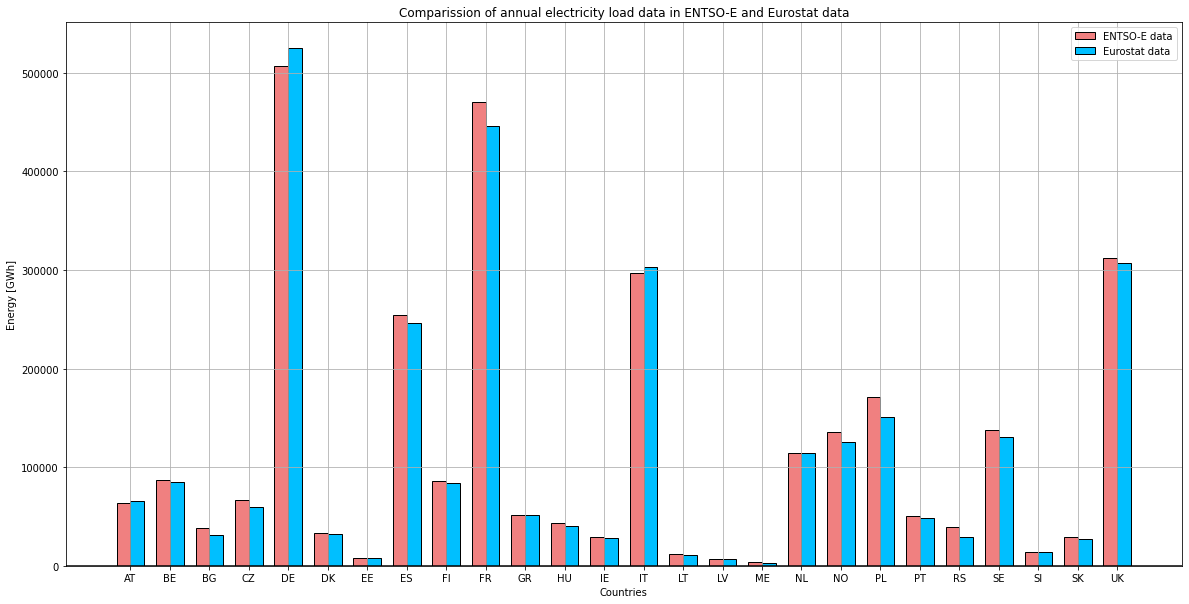

In [13]:
ii.eurostat_comparission_load_data(load_data, countries)


### 4.1.3 Comparing annual import/export data of ENTSO-E & Eurostat data

,Country,Net imports/exports data based on ENTSO-E[GWh],Net imports/exports data based on Eurostat[GWh],% difference with respect to Value based on ENTSO-E [%]
0,AT,-10350.50,-8946.81,13.56
1,BE,-17523.23,-17327.50,1.12
2,BG,7545.95,7807.32,-3.46
3,CZ,13616.21,13907.09,-2.14
4,DE,50586.54,48736.00,3.66
5,DK,-5128.40,-5224.34,-1.87
6,EE,1373.58,1897.00,-38.11
7,ES,-14589.26,-11102.00,23.90
8,FI,-19551.70,-19936.00,-1.97
9,FR,59981.88,62966.70,-4.98


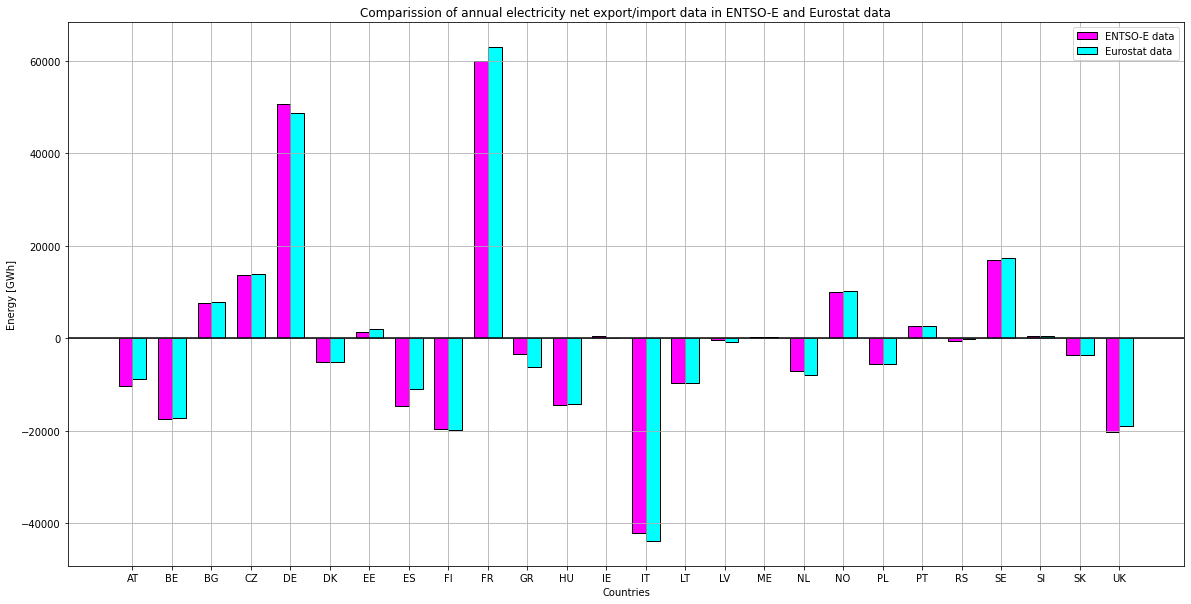

In [14]:
ii.eurostat_comparission_transmission_data(import_export_using_crossborder_data, countries)